# AF3 evaluation
Created 2025-03-07

Now, as the structures have been parsed (finally), it's time to regenerate the metrics of the AF2 benchmark

In [1]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.axes._axes import Axes
from matplotlib.figure import Figure
from pathlib import Path
from sklearn.metrics import roc_curve, roc_auc_score

In [2]:
# Settings

# Path to the parsed AF3 output
path_AF3_structures = Path("../ressources/AF3").resolve()

In [3]:
dataAF = pd.read_csv(path_AF3_structures / "AF3_metrics_full.tsv", sep="\t")
dataAF

,model_preset,benchmark_set,prediction_name,model_id,chainA_length,chainB_length,fraction_disordered,has_clash,iptm,ptm,...,chainB_start,chainB_end,num_mutations,RMSD_domain,align_score_domain,num_align_atoms_domain,num_align_resi_domain,RMSD_backbone_peptide,RMSD_all_atom_peptide,RMSD_DDI_max
0,alphafold3,known_ddi,PF00009_PF01873_2D74_A_resi12_resi200.B_resi21...,ranked_0,189,113,0.04,0.0,0.20,0.53,...,21.0,133.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.313323
1,alphafold3,known_ddi,PF00009_PF01873_2D74_A_resi12_resi200.B_resi21...,ranked_1,189,113,0.04,0.0,0.16,0.51,...,21.0,133.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.992111
2,alphafold3,known_ddi,PF00009_PF01873_2D74_A_resi12_resi200.B_resi21...,ranked_2,189,113,0.04,0.0,0.13,0.46,...,21.0,133.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.291040
3,alphafold3,known_ddi,PF00009_PF01873_2D74_A_resi12_resi200.B_resi21...,ranked_3,189,113,0.04,0.0,0.10,0.47,...,21.0,133.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.732747
4,alphafold3,known_ddi,PF00009_PF01873_2D74_A_resi12_resi200.B_resi21...,ranked_4,189,113,0.04,0.0,0.07,0.49,...,21.0,133.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.577190
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3175,alphafold3,random_minimal,MTRG_PTS1_2C0L.DLIG_WD40_WDR5_WIN_2_4CY3,ranked_0,312,4,0.02,0.0,0.91,0.95,...,140.0,143.0,NaN,0.684738,1624.0,2356.0,303.0,NaN,NaN,NaN
3176,alphafold3,random_minimal,MTRG_PTS1_2C0L.DLIG_WD40_WDR5_WIN_2_4CY3,ranked_1,312,4,0.01,0.0,0.90,0.95,...,140.0,143.0,NaN,0.684467,1624.0,2356.0,303.0,NaN,NaN,NaN
3177,alphafold3,random_minimal,MTRG_PTS1_2C0L.DLIG_WD40_WDR5_WIN_2_4CY3,ranked_2,312,4,0.02,0.0,0.90,0.95,...,140.0,143.0,NaN,1.018179,1624.0,2356.0,303.0,NaN,NaN,NaN
3178,alphafold3,random_minimal,MTRG_PTS1_2C0L.DLIG_WD40_WDR5_WIN_2_4CY3,ranked_3,312,4,0.01,0.0,0.90,0.95,...,140.0,143.0,NaN,0.658395,1624.0,2356.0,303.0,NaN,NaN,NaN


### ROC Curve

In [67]:
dataAF.columns

Index(['model_preset', 'benchmark_set', 'prediction_name', 'model_id',
       'chainA_length', 'chainB_length', 'fraction_disordered', 'has_clash',
       'iptm', 'ptm', 'ranking_score', 'chainA_intf_avg_plddt',
       'chainB_intf_avg_plddt', 'intf_avg_plddt', 'num_chainA_intf_res',
       'num_chainB_intf_res', 'num_res_res_contact', 'num_atom_atom_contact',
       'iPAE', 'pDockQ', 'model_path', 'PDB_id', 'ELM_instance', 'ddi_pfam_id',
       'PDB_id_random_paired', 'ELM_instance_random_paired',
       'ddi_pfam_id_random_paired', 'sequence_initial', 'sequence_mutated',
       'chainA_id', 'chainB_id', 'chains_flipped', 'chainA_start',
       'chainA_end', 'chainB_start', 'chainB_end', 'num_mutations',
       'RMSD_domain', 'align_score_domain', 'num_align_atoms_domain',
       'num_align_resi_domain', 'RMSD_backbone_peptide',
       'RMSD_all_atom_peptide', 'RMSD_DDI_max'],
      dtype='object')

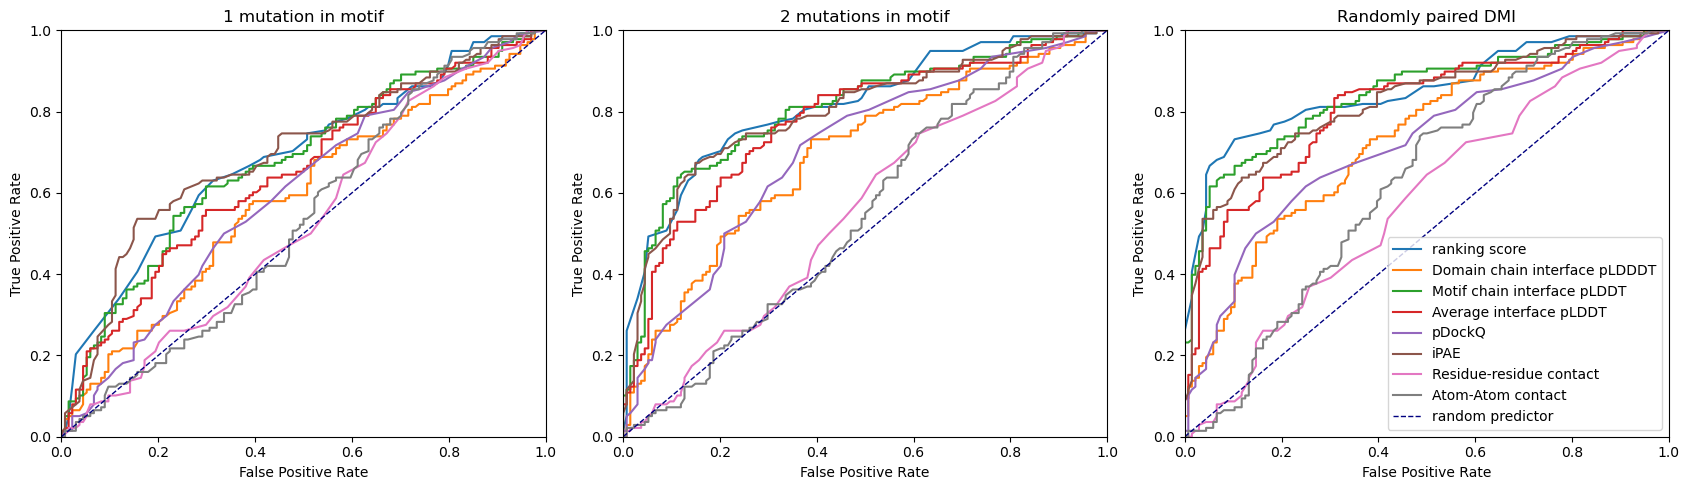

In [99]:
#plt.plot(roc_conf_X, roc_conf_Y, label=f"model confidence (AUC = {roc_conf:.2f})")
#plt.plot(roc_model_X, roc_model_Y, label=f"ml prediction (AUC = {roc_model:.2f})")
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(17,5))
fig: Figure
axes: list[Axes] = list(axes)


    
axes[0].set_title("1 mutation in motif")
axes[1].set_title("2 mutations in motif")
axes[2].set_title("Randomly paired DMI")

metric_columns = [("ranking score", "ranking_score"), 
                  ("Domain chain interface pLDDDT", "chainA_intf_avg_plddt"),
                  ("Motif chain interface pLDDT", "chainB_intf_avg_plddt"),
                  ("Average interface pLDDT", "intf_avg_plddt"),
                  ("pDockQ", "pDockQ"),
                  ("iPAE", "iPAE", True),
                  ("Residue-residue contact", "num_res_res_contact"),
                  ("Atom-Atom contact", "num_atom_atom_contact"),
                ]
metric_columns = [[x[0], x[1], x[2] if len(x) == 3 else None] for x in metric_columns]

rows_sets = [dataAF[dataAF["num_mutations"] == 1], dataAF[dataAF["num_mutations"] == 2], dataAF[dataAF["benchmark_set"] == "random_minimal"]]
rows_sets = [df[df["model_id"] == "ranked_0"] for df in rows_sets]
#rows_true = dataAF[dataAF["benchmark_set"] == "known_minimal"]
rows_true = dataAF[np.logical_and(dataAF["benchmark_set"] == "known_minimal", dataAF["model_id"] == "ranked_0")]



for ax, rows_false in zip(axes, rows_sets):
    y_true = [1]*len(rows_true) + [0]*len(rows_false)

    for metric_label, metric_column, reverse in metric_columns:
        y_score = rows_true[metric_column].to_list() + rows_false[metric_column].to_list()
        if reverse:
            y_score = [-y for y in y_score]
        ax.plot(*roc_curve(y_true, y_score)[0:2], label=metric_label)

    ax.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--', label="random predictor")
    ax.set_xlim([0,1])
    ax.set_ylim([0,1])
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')


fig.tight_layout()
axes[2].legend(loc="lower right")
plt.show()


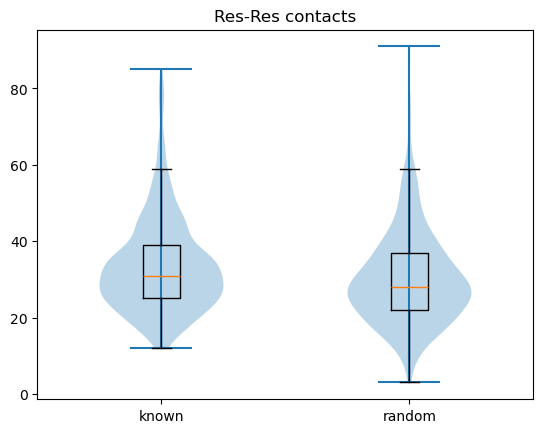

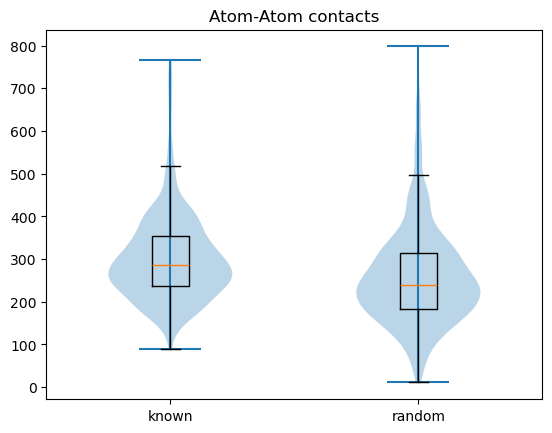

In [78]:
num_aa_known = dataAF[dataAF["benchmark_set"] == "known_minimal"]
num_aa_random = dataAF[dataAF["benchmark_set"] == "random_minimal"]
plt.violinplot([num_aa_known["num_res_res_contact"], num_aa_random["num_res_res_contact"]])
plt.boxplot([num_aa_known["num_res_res_contact"], num_aa_random["num_res_res_contact"]], showfliers=False)
plt.xticks([1,2], ["known", "random"])
plt.title("Res-Res contacts")
plt.show()
plt.violinplot([num_aa_known["num_atom_atom_contact"],num_aa_random["num_atom_atom_contact"]])
plt.boxplot([num_aa_known["num_atom_atom_contact"],num_aa_random["num_atom_atom_contact"]], showfliers=False)
plt.xticks([1,2], ["known", "random"])
plt.title("Atom-Atom contacts")
plt.show()

### RMSD based classification